In [32]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [28]:
# source: https://catalog.data.gov/dataset/electric-vehicle-population-data 11.07.2024
data_org= pd.read_csv("data/Electric_Vehicle_Population_Data.csv")

data_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191407 entries, 0 to 191406
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         191407 non-null  object 
 1   County                                             191403 non-null  object 
 2   City                                               191403 non-null  object 
 3   State                                              191407 non-null  object 
 4   Postal Code                                        191403 non-null  float64
 5   Model Year                                         191407 non-null  int64  
 6   Make                                               191407 non-null  object 
 7   Model                                              191407 non-null  object 
 8   Electric Vehicle Type                              191407 non-null  object

In [29]:
def columns_with_datatype(data, types):
    if type(types) == str:
        types = [types]
    #print(types)
    r = [c for c in data_org.columns if data_org[c].dtype in types] # Correct
    #print(f"{types}:{r}")
    return r

def columns_with_null_values(data, types):
    if type(types) == str:
        types = [types]
    #print(types)
    r = [c for c in data_org.columns if data_org[c].dtype in types] # Correct
    #print(f"{types}:{r}")
    return r

# int and float
int_float_cols = columns_with_datatype(data_org, ['int64', 'float64'])
int_cols = columns_with_datatype(data_org, 'int64')
float_cols = columns_with_datatype(data_org, 'float64')
object_cols = columns_with_datatype(data_org, 'object')

## Todo
* Make, Model transform to ?
* What is VIN?
* County/City/State relevant?

In [30]:
# Transform datatypes
data_org.dtypes


cols_to_convert_to_int = ['Postal Code']

data_org['Postal Code']

# Postal code to int
data_org['Postal Code'] = pd.to_numeric(data_org['Postal Code'], errors='coerce')
data_org[cols_to_convert_to_int] = data_org[cols_to_convert_to_int].fillna(0).astype(int)

data_org['Postal Code']

0         98112
1         98953
2         98031
3         98012
4         98908
          ...  
191402    98390
191403    98396
191404    98024
191405    98520
191406    99352
Name: Postal Code, Length: 191407, dtype: int32

Following numerical colums have null-values:
Skip: County   Type: object
Skip: City   Type: object
Col: Legislative District			Cnt: 414	Mean: 29.0168801997979	Min: 1.0	Max: 49.0
Skip: Vehicle Location   Type: object
Skip: Electric Utility   Type: object
Col: 2020 Census Tract			Cnt: 4	Mean: 52977586466.11762	Min: 1001020100.0	Max: 56021001100.0


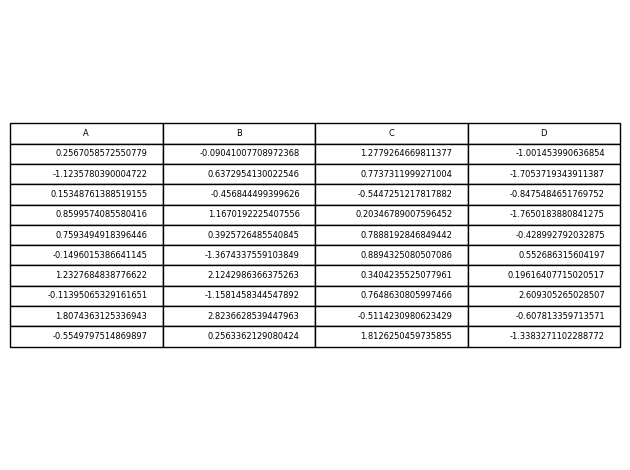

In [35]:
#data_org.isnull().any()

cols_with_null_values = [i for i in data_org.columns if data_org[i].isnull().any()] 
print("Following numerical colums have null-values:")

col_to_show = []
for c in cols_with_null_values:
    if data_org[c].dtype in ['object']:
        print(f"Skip: {c}   Type: {data_org[c].dtype}")
        continue

    col_to_show.append(c)
    
    null_count = data_org[c].isnull().sum()
    mean_val = data_org[c].mean()  # Ignore null values for mean calculation
    min_val = data_org[c].min()    # Ignore null values for min calculation
    max_val = data_org[c].max()    # Ignore null values for max calculation
    print(f"Col: {c}\t\t\tCnt: {null_count}\tMean: {mean_val}\tMin: {min_val}\tMax: {max_val}")


fig, ax = plt.subplots()

# hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

df = pd.DataFrame(np.random.randn(10, 4), columns=list('ABCD'))

ax.table(cellText=df.values, colLabels=df.columns, loc='center')

fig.tight_layout()

plt.show()

In [9]:
# applying mask
mask = np.triu(np.ones_like(data_org.corr()))

# plotting a triangle correlation heatmap
dataplot = sb.heatmap(data_org.corr(), mask=mask)

ValueError: could not convert string to float: '5YJSA1E22K'